# **Classification Model - KlekotaRoth Count**




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('acetylcholinesterase_dataset_KlekotaRothCount.csv')

In [ ]:
import numpy as np
df = df[np.isfinite(df).all(1)]
df = df.reset_index(drop=True)

In [ ]:
df.head()

,KRFPC1,KRFPC2,KRFPC3,KRFPC4,KRFPC5,KRFPC6,KRFPC7,KRFPC8,KRFPC9,KRFPC10,...,KRFPC4852,KRFPC4853,KRFPC4854,KRFPC4855,KRFPC4856,KRFPC4857,KRFPC4858,KRFPC4859,KRFPC4860,pIC50
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910


In [ ]:
bioactivity_threshold = []
for i in df.pIC50:
  if float(i) <= 5.0:
    bioactivity_threshold.append("Inactive") #inactive
  elif float(i) >= 6.0:
    bioactivity_threshold.append("Active") #active
  else:
    bioactivity_threshold.append("Intermediate") #intermediate

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='Bio_class')
df = pd.concat([df, bioactivity_class], axis=1)
df

,KRFPC1,KRFPC2,KRFPC3,KRFPC4,KRFPC5,KRFPC6,KRFPC7,KRFPC8,KRFPC9,KRFPC10,...,KRFPC4853,KRFPC4854,KRFPC4855,KRFPC4856,KRFPC4857,KRFPC4858,KRFPC4859,KRFPC4860,pIC50,Bio_class
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939,Active
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,Active
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030,Inactive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879,Active
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.590067,Active
5820,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.621602,Active
5821,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.387216,Active
5822,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.200659,Active


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


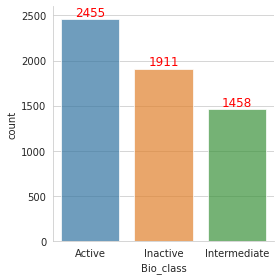

In [ ]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 
sns.factorplot('Bio_class', data=df, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df['Bio_class'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')


In [ ]:
X = df.drop(['pIC50','Bio_class'], axis=1)
X

,KRFPC1,KRFPC2,KRFPC3,KRFPC4,KRFPC5,KRFPC6,KRFPC7,KRFPC8,KRFPC9,KRFPC10,...,KRFPC4851,KRFPC4852,KRFPC4853,KRFPC4854,KRFPC4855,KRFPC4856,KRFPC4857,KRFPC4858,KRFPC4859,KRFPC4860
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5820,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5821,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5822,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y = df.Bio_class
Y

0         Active
1         Active
2       Inactive
3         Active
4         Active
          ...   
5819      Active
5820      Active
5821      Active
5822      Active
5823      Active
Name: Bio_class, Length: 5824, dtype: object

In [ ]:
X.shape

(5824, 4860)

In [ ]:
Y.shape

(5824,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,KRFPC1,KRFPC2,KRFPC14,KRFPC18,KRFPC20,KRFPC67,KRFPC232,KRFPC297,KRFPC298,KRFPC302,...,KRFPC4331,KRFPC4521,KRFPC4523,KRFPC4583,KRFPC4695,KRFPC4752,KRFPC4763,KRFPC4770,KRFPC4813,KRFPC4843
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,2.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5820,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5821,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5822,2.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Cols = list(X.columns)

In [ ]:
from sklearn import *
X = preprocessing.normalize(X,norm='l2')
X

array([[0.05031546, 0.        , 0.        , ..., 0.        , 0.        ,
        0.05031546],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09365858,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05944383],
       ...,
       [0.04518692, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04097019, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0520051 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X = pd.DataFrame(X, columns =Cols)
X

,KRFPC1,KRFPC2,KRFPC14,KRFPC18,KRFPC20,KRFPC67,KRFPC232,KRFPC297,KRFPC298,KRFPC302,...,KRFPC4331,KRFPC4521,KRFPC4523,KRFPC4583,KRFPC4695,KRFPC4752,KRFPC4763,KRFPC4770,KRFPC4813,KRFPC4843
0,0.050315,0.0,0.0,0.0,0.0,0.0,0.0,0.352208,0.050315,0.0,...,0.050315,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.050315
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.187317,0.000000,0.0,...,0.374634,0.0,0.0,0.0,0.093659,0.000000,0.0,0.0,0.093659,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.356663,0.000000,0.0,...,0.059444,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.059444
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.122169,0.000000,0.0,...,0.122169,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.122169
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.203069,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.101535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,0.051554,0.0,0.0,0.0,0.0,0.0,0.0,0.309324,0.103108,0.0,...,0.077331,0.0,0.0,0.0,0.000000,0.025777,0.0,0.0,0.000000,0.000000
5820,0.054213,0.0,0.0,0.0,0.0,0.0,0.0,0.298170,0.108425,0.0,...,0.027106,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
5821,0.045187,0.0,0.0,0.0,0.0,0.0,0.0,0.316308,0.090374,0.0,...,0.045187,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
5822,0.040970,0.0,0.0,0.0,0.0,0.0,0.0,0.245821,0.081940,0.0,...,0.040970,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
Ly = LabelEncoder()
Ly.fit_transform(Y)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Ly.classes_

array(['Active', 'Inactive', 'Intermediate'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((4659, 255), (4659,))

In [ ]:
X_test.shape, Y_test.shape

((1165, 255), (1165,))

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1
!pip install PyYAML==5.3.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 13.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 22.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=cf7d75fc56d7c89ba909aadb4d153148f686012fea0c2ac5c697959bc83d2666
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 29/29 [00:28<00:00,  1.02it/s]


In [ ]:
# Performance table of the training set (80% subset)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.99,0.99,None,0.99,0.58
LGBMClassifier,0.99,0.99,None,0.99,3.97
LabelSpreading,0.99,0.99,None,0.99,0.35
DecisionTreeClassifier,0.99,0.99,None,0.99,0.22
ExtraTreeClassifier,0.99,0.99,None,0.99,0.09
ExtraTreesClassifier,0.99,0.99,None,0.99,0.78
LabelPropagation,0.99,0.99,None,0.99,0.40
BaggingClassifier,0.98,0.98,None,0.98,1.29
QuadraticDiscriminantAnalysis,0.92,0.92,None,0.92,0.18


In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:18<00:00,  1.58it/s]


In [ ]:
# Performance table of the test set (20% subset)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.65,0.62,None,0.64,3.88
RandomForestClassifier,0.64,0.60,None,0.63,0.58
ExtraTreesClassifier,0.63,0.60,None,0.62,0.38
SVC,0.63,0.60,None,0.61,0.38
NuSVC,0.62,0.60,None,0.62,0.39
XGBClassifier,0.63,0.59,None,0.61,2.25
KNeighborsClassifier,0.61,0.58,None,0.60,0.08
BaggingClassifier,0.61,0.58,None,0.60,0.57
QuadraticDiscriminantAnalysis,0.61,0.57,None,0.59,0.19
